# Numerically calculate simple cyclotron motion 

In [1]:
import numpy as np
from scipy.integrate import ode, odeint
import matplotlib.pyplot as plt

In [2]:
m_e = 9.11E-31 # kg
q_e = -1.6E-19 # C
R_e = 6371E3 # m

## Cyclotron motion in the equatorial magnetosphere

In [3]:
L = 5
B = 3.12E-5*(1/L)**3  # T

In [4]:
def f(X, t, q, m, B):
    """
    Calculate the derivatives of the position and velocity.

    X = [x, v_x, y, v_y]
    """
    w_c = np.sqrt(m/(q*B))
    ode_matrix = np.array([
            [0, 1, 0, 0],
            [0, 0, 0, 1/w_c**2],
            [0, 0, 0, 1],
            [0, 1/w_c**2, 0, 0]
        ])
    return np.matmul(ode_matrix, X)

In [14]:
t = np.arange(0, 50, 0.05)
X0 = (0, 1, 0, 1)  # x, v_x, y, v_y
args = (1, 1, 1)  # q, m , B
solution = odeint(f, X0, t, args=args)

In [16]:
solution

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.12710901e-02, 1.05127109e+00, 5.12710901e-02, 1.05127109e+00],
       [1.05170911e-01, 1.10517091e+00, 1.05170911e-01, 1.10517091e+00],
       ...,
       [4.46252122e+21, 4.46252122e+21, 4.46252122e+21, 4.46252122e+21],
       [4.69131958e+21, 4.69131958e+21, 4.69131958e+21, 4.69131958e+21],
       [4.93184868e+21, 4.93184868e+21, 4.93184868e+21, 4.93184868e+21]])

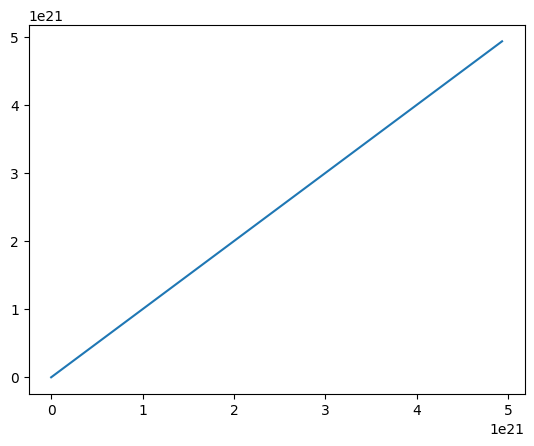

In [15]:
plt.plot(solution[:, 0], solution[:, 2])